## Visualization of data

Here I use *R* to visualize the data. 

In [3]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)


In [4]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
%%R

# My commonly used R imports

require('ggplot2')
require('readr')
require('extrafont')
require('dplyr')
require('reshape2')
# require('theme538')
require('tidyverse')

R[write to console]: Loading required package: ggplot2

R[write to console]: Loading required package: readr

R[write to console]: Loading required package: extrafont

R[write to console]: Registering fonts with R

R[write to console]: Loading required package: dplyr

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: Loading required package: reshape2

R[write to console]: Loading required package: tidyverse



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/laurabejder/federal_judges_appointment/main/data/data.csv')

In [7]:
mean = df.groupby('congress_no')['yea_votes'].mean()
median = df.groupby('congress_no')['yea_votes'].median()

mean.to_csv('data/mean_votes_congresses.csv', index=True)
median.to_csv('data/median_votes_congresses.csv', index=True)

Rows: 11 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): congress_no, yea_votes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


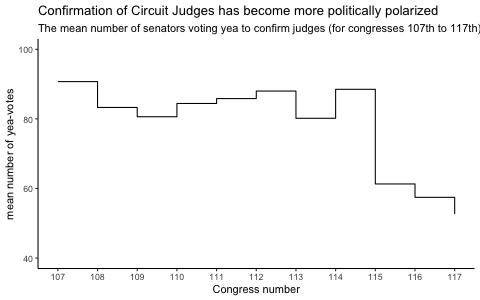

In [8]:
%%R -h 300

#Load in the mean data
df <- read_csv('data/mean_votes_congresses.csv')

ggplot(data=df, aes(x=congress_no, y=yea_votes)) +
  geom_step()+
  coord_cartesian(xlim = c(107, 117), 
                  ylim = c(40, 100)) +
  scale_x_continuous(breaks=seq(107, 117))+
  theme_classic() +
  labs(
    x = 'Congress number',
    y = 'mean number of yea-votes',
    title = 'Confirmation of Circuit Judges has become more politically polarized',
    subtitle = 'The mean number of senators voting yea to confirm judges (for congresses 107th to 117th)'
  )

Rows: 11 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): congress_no, yea_votes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


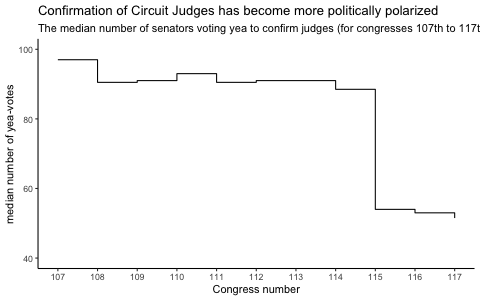

In [9]:
%%R -h 300

#Load in the mean data
df <- read_csv('data/median_votes_congresses.csv')

ggplot(data=df, aes(x=congress_no, y=yea_votes)) +
  geom_step()+
  coord_cartesian(xlim = c(107, 117), 
                  ylim = c(40, 100)) +
  scale_x_continuous(breaks=seq(107, 117))+
  theme_classic() +
  labs(
    x = 'Congress number',
    y = 'median number of yea-votes',
    title = 'Confirmation of Circuit Judges has become more politically polarized',
    subtitle = 'The median number of senators voting yea to confirm judges (for congresses 107th to 117th)'
  )

In [10]:
df_long = pd.read_csv('https://raw.githubusercontent.com/laurabejder/federal_judges_appointment/main/data/data.csv')\
    .query("record_vote_number.notna()")[
    ['name', 'D_yea', 'R_yea', 'I_yea']].melt(id_vars='name')

df_long.to_csv('long_df.csv', index=False)

df_long

,name,variable,value
0,Roopali H. Desai,D_yea,46
1,Florence Y. Pan,D_yea,46
2,Sarah A. L. Merriam,D_yea,48
3,Lara E. Montecalvo,D_yea,47
4,Salvador Mendoza Jr,D_yea,41
...,...,...,...
520,Barrington D. Parker,I_yea,1
521,Terrence L. O'Brien,I_yea,1
522,Michael J. Melloy,I_yea,1
523,William J. Riley,I_yea,1


In [11]:
df_long = pd.read_csv('https://raw.githubusercontent.com/laurabejder/federal_judges_appointment/main/data/data.csv')\
    .query("record_vote_number.notna()")[
    ['name', 'congress_no', 'session', 'circuit', 'democrats','republicans','independents', 'D_yea', 'R_yea', 'I_yea','confirmation_date']]\
    .sort_values(by='confirmation_date', ascending=False)\
    .melt(id_vars=['name', 'congress_no', 'session', 'circuit', 'democrats','republicans','independents','confirmation_date'])

df_long.to_csv('long_df.csv', index=False)

Rows: 525 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): name, circuit, variable
dbl  (6): congress_no, session, democrats, republicans, independents, value
date (1): confirmation_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


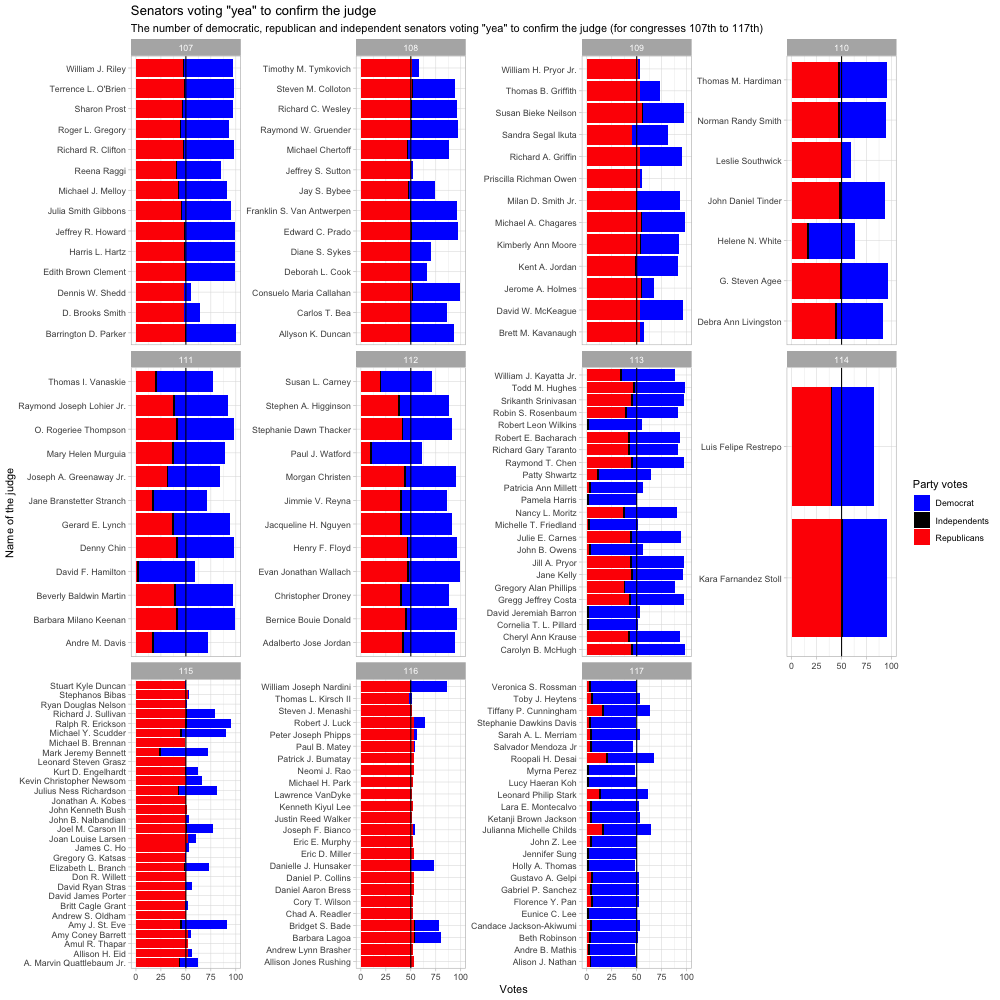

In [12]:
%%R -h 1000 -w 1000
require('tidyverse')

# EXAMPLE R CELL
df <- read_csv('long_df.csv') %>%
    select(c(name, value, variable, congress_no))
 
ggplot(df, aes(y=name, x=value, fill=variable)) + 
    geom_col() + 
    geom_vline(aes(xintercept=50)) +
    facet_wrap(~congress_no, scales='free_y') +
    scale_fill_manual(values=c("blue", "black", "red"), 
                       name="Party votes",
                       breaks=c("D_yea", "I_yea", "R_yea"),
                       labels=c("Democrat", "Independents", "Republicans")) +
    theme_light()+
    labs(
    x = 'Votes',
    y = 'Name of the judge',
    title = 'Senators voting "yea" to confirm the judge',
    subtitle = 'The number of democratic, republican and independent senators voting "yea" to confirm the judge (for congresses 107th to 117th)'
    )

In [13]:
%%R -h 1300 -w 900
require('tidyverse')

# EXAMPLE R CELL
df <- read_csv('long_df.csv') %>%
    select(c(name, value, variable, congress_no))

dose.labs <- c("107th congress", "108th congress", "109th congress", "110th congress", "111th congress", "112th congress", "113th congress", "114th congress", "115th congress", "116th congress", "117th congress")
names(dose.labs) <- c("107", "108", "109", "110", "111", "112", "113", "114", "115", "116", "117")
 
ggplot(df, aes(y=name, x=value, fill=variable)) + 
    geom_col() + 
    geom_vline(aes(xintercept=50)) +
    facet_wrap(~congress_no, 
        scales='free_y',
        labeller = labeller(congress_no = dose.labs),
        ncol = 3,
        nrow = 4) +
    scale_fill_manual(values=c("blue", "black", "red"), 
                       name="Party votes",
                       breaks=c("D_yea", "I_yea", "R_yea"),
                       labels=c("Democrat", "Independents", "Republicans")) +
    theme_light()+
    theme(
        plot.title = element_text(family = "Helvetica", size=22, face ="bold"),
        plot.subtitle = element_text(family = "Helvetica", size=16),
        strip.text.x = element_text(family = "Helvetica", size = 13)
        ) +
    labs(
    x = 'Votes',
    y = 'Name of the judge',
    title = 'The confirmation of US circuit judges has become more partisan',
    subtitle = 'The number of democratic, republican and independent senators voting to confirm the circuit \njudge, 2001-2022 (congresses 107th to 117th)'
    )

# Save the plot as a pdf
ggsave("docs/visualizations/party_votes.pdf")

Rows: 525 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): name, circuit, variable
dbl  (6): congress_no, session, democrats, republicans, independents, value
date (1): confirmation_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Saving 12.5 x 18.1 in image


Rows: 525 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): name, circuit, variable
dbl  (6): congress_no, session, democrats, republicans, independents, value
date (1): confirmation_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


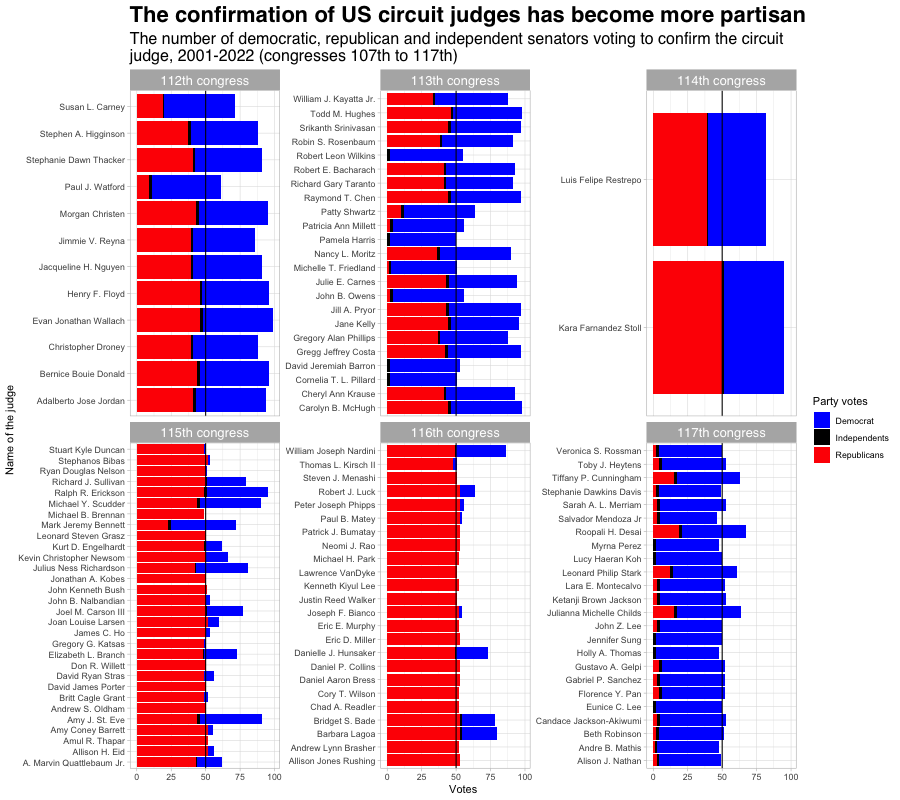

In [ ]:
%%R -h 800 -w 900
require('tidyverse')

# EXAMPLE R CELL
df <- read_csv('long_df.csv') %>%
    select(c(name, value, variable, congress_no))

df_filtered <- df %>%
    filter(congress_no > 111)

dose.labs <- c("107th congress", "108th congress", "109th congress", "110th congress", "111th congress", "112th congress", "113th congress", "114th congress", "115th congress", "116th congress", "117th congress")
names(dose.labs) <- c("107", "108", "109", "110", "111", "112", "113", "114", "115", "116", "117")
 
ggplot(df_filtered, aes(y=name, x=value, fill=variable)) + 
    geom_col() + 
    geom_vline(aes(xintercept=50)) +
    facet_wrap(~congress_no, 
        scales='free_y',
        labeller = labeller(congress_no = dose.labs),
        ncol = 3,
        nrow = 4) +
    scale_fill_manual(values=c("blue", "black", "red"), 
                       name="Party votes",
                       breaks=c("D_yea", "I_yea", "R_yea"),
                       labels=c("Democrat", "Independents", "Republicans")) +
    theme_light()+
    theme(
        plot.title = element_text(family = "Helvetica", size=22, face ="bold"),
        plot.subtitle = element_text(family = "Helvetica", size=16),
        strip.text.x = element_text(family = "Helvetica", size = 13)
        ) +
    labs(
    x = 'Votes',
    y = 'Name of the judge',
    title = 'The confirmation of US circuit judges has become more partisan',
    subtitle = 'The number of democratic, republican and independent senators voting to confirm the circuit \njudge, 2001-2022 (congresses 107th to 117th)'
    )